In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

In [2]:
file_path = r"D:\DEBADES SIR;S PAPERS\FORTRAN TOV Code\aghto300m0.7.excel.csv"

In [3]:

sly = np.genfromtxt(file_path, delimiter=',')


rhos=sly[:,3]*(1.3234*(10**(-6))) # in km^-2
Ps=sly[:,4]*(1.3234*(10**(-6)))   # in km^-2

In [4]:
print(rhos)

[1.9056960e-05 3.8113920e-05 5.7303220e-05 7.6360180e-05 9.5549480e-05
 1.1487112e-04 1.3366340e-04 1.5351440e-04 1.7336540e-04 1.9321640e-04
 2.1306740e-04 2.3291840e-04 2.5409280e-04 2.7394380e-04 2.9511820e-04
 3.1496920e-04 3.3614360e-04 3.5864140e-04 3.7981580e-04 4.0231360e-04
 4.2481140e-04 4.4730920e-04 4.6980700e-04 4.9230480e-04 5.1612600e-04
 5.3994720e-04 5.6376840e-04 5.8758960e-04 6.1273420e-04 6.3655540e-04
 6.6170000e-04 6.8684460e-04 7.1198920e-04 7.3713380e-04 7.6360180e-04
 7.8874640e-04 8.1521440e-04 8.4168240e-04 8.6815040e-04 8.9594180e-04
 9.2240980e-04 9.5020120e-04 9.7799260e-04 1.0057840e-03 1.0335754e-03
 1.0626902e-03 1.0918050e-03 1.1209198e-03 1.1500346e-03 1.1791494e-03
 1.2095876e-03 1.2400258e-03 1.2691406e-03 1.3009022e-03 1.3366340e-03
 1.3631020e-03 1.3895700e-03 1.4292720e-03 1.4557400e-03 1.4954420e-03
 1.5219100e-03 1.5483780e-03 1.5880800e-03 1.6277820e-03 1.6542500e-03
 1.6939520e-03 1.7204200e-03 1.7601220e-03 1.7865900e-03 1.8262920e-03
 1.865

In [5]:
print(Ps)

[1.2095876e-08 3.0967560e-08 1.0415158e-07 2.7923740e-07 5.9685340e-07
 1.0931284e-06 1.7998240e-06 2.7526720e-06 3.9437320e-06 5.3862380e-06
 7.1198920e-06 9.1711620e-06 1.1579750e-05 1.4425060e-05 1.7601220e-05
 2.1174400e-05 2.5276940e-05 2.9776500e-05 3.4937760e-05 4.0496040e-05
 4.6716020e-05 5.3465360e-05 6.0082360e-05 6.5772980e-05 7.1595940e-05
 7.7551240e-05 8.3638880e-05 8.9991200e-05 9.6740540e-05 1.0362222e-04
 1.1090092e-04 1.1844430e-04 1.2625236e-04 1.3366340e-04 1.4292720e-04
 1.5086760e-04 1.6013140e-04 1.6939520e-04 1.7865900e-04 1.8924620e-04
 1.9983340e-04 2.1042060e-04 2.2100780e-04 2.3159500e-04 2.4350560e-04
 2.5541620e-04 2.6732680e-04 2.7923740e-04 2.9247140e-04 3.0570540e-04
 3.1893940e-04 3.3217340e-04 3.4673080e-04 3.5996480e-04 3.7452220e-04
 3.9040300e-04 4.0496040e-04 4.2084120e-04 4.3539860e-04 4.5260280e-04
 4.6848360e-04 4.8436440e-04 5.0156860e-04 5.1877280e-04 5.3730040e-04
 5.5450460e-04 5.7303220e-04 5.9155980e-04 6.1008740e-04 6.2861500e-04
 6.484

In [6]:
cPs=CubicSpline(rhos,Ps) # Pressure is a function of density
crhos=CubicSpline(Ps,rhos) # Density is a function of pressure

In [7]:
def f(x):
    r=x[0]
    m=x[1]
    P=x[2]
    
    rho=crhos(P)
    
    dr_dr=1
    dm_dr=4*np.pi*(r**2)*rho
    dP_dr=-((m*rho)/(r**2))*(1+(P/(rho)))*(1+((4*np.pi*P*(r**3))/(m)))*((1-((2*m)/(r)))**(-1))
    
    return np.array([dr_dr,dm_dr,dP_dr])

In [8]:
def ns_solve(rho_c):
    
    h=0.005 # in km
    
    P_c=cPs(rho_c)
    
    X=np.zeros([3,80000])
    
    X[:,0]=np.array([0.005,(7.4237*(10**(-34))),P_c])
    
    D=[]
    E=[]
    F=[]
    
    
    for i in range(1,80000):
        
        k1=f(X[:,i-1])
        k2=f(X[:,i-1]+k1*0.5*h)
        k3=f(X[:,i-1]+k2*0.5*h)
        k4=f(X[:,i-1]+k3*h)
        
        X[:,i]=X[:,i-1]+ (h*(k1+2*k2+2*k3+k4))/6
        
        
        
        
        D.append(X[0,i-1])
        E.append(X[1,i-1]/1.4766)
        F.append(X[2,i-1]/(1.3234*(10**(-6))))
            
    return X[:,i-1],D,E,F




In [9]:
G=ns_solve(0.00139253)


In [11]:
print(len(G[1]))

2356


In [12]:
print(cPs(0.00139253))

0.0004062531531174311


In [13]:
print(cPs(0.00139253))


0.0004062531531174311


In [ ]:
print(G[1][0])
print(G[2][0])
print(G[3][0])

In [14]:

print("The central pressure of this star is",G[3][0],"MeV/fm^3")
print("The total radius for this star is",G[0][0],"km") 
print("The total mass for this star is",G[0][1]/1.4766,"M⊙")


The central pressure of this star is 306.9768423133075 MeV/fm^3
The total radius for this star is 11.785000000000442 km
The total mass for this star is 2.04290546201589 M⊙


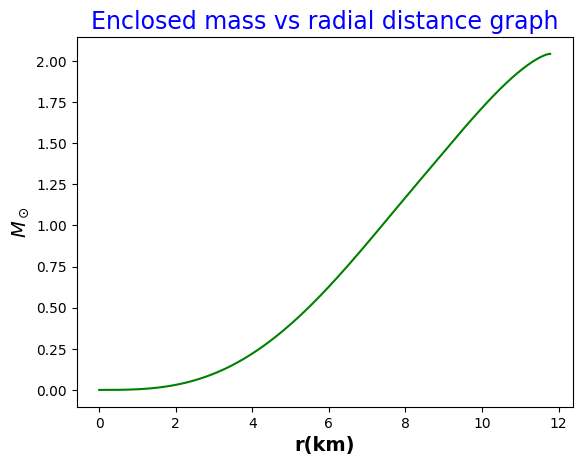

In [15]:
plt.plot(G[1],G[2],"g")
plt.title("Enclosed mass vs radial distance graph",color="blue",size=17)
plt.xlabel("r(km)", fontsize=14, fontweight='bold')
plt.ylabel("$M_\odot$", fontsize=14, fontweight='bold')
plt.show()

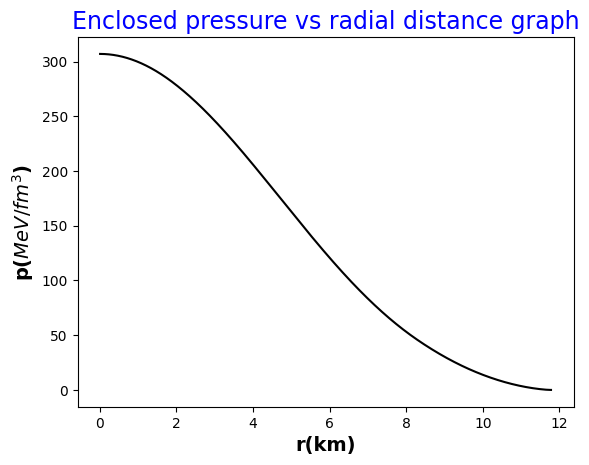

In [16]:
plt.plot(G[1],G[3],"k")
plt.title("Enclosed pressure vs radial distance graph",color="blue",size=17)
plt.xlabel("r(km)", fontsize=14, fontweight='bold')
plt.ylabel("p($MeV/fm^3$)", fontsize=14, fontweight='bold')
plt.show()

In [17]:
rho=np.linspace(1.1487112e-04,3.0041180e-03,200)


res_s=np.zeros([3,len(rho)])

In [18]:
print(rho)

[0.00011487 0.00012939 0.00014391 0.00015843 0.00017295 0.00018747
 0.00020198 0.0002165  0.00023102 0.00024554 0.00026006 0.00027458
 0.0002891  0.00030362 0.00031813 0.00033265 0.00034717 0.00036169
 0.00037621 0.00039073 0.00040525 0.00041977 0.00043429 0.0004488
 0.00046332 0.00047784 0.00049236 0.00050688 0.0005214  0.00053592
 0.00055044 0.00056495 0.00057947 0.00059399 0.00060851 0.00062303
 0.00063755 0.00065207 0.00066659 0.00068111 0.00069562 0.00071014
 0.00072466 0.00073918 0.0007537  0.00076822 0.00078274 0.00079726
 0.00081177 0.00082629 0.00084081 0.00085533 0.00086985 0.00088437
 0.00089889 0.00091341 0.00092793 0.00094244 0.00095696 0.00097148
 0.000986   0.00100052 0.00101504 0.00102956 0.00104408 0.00105859
 0.00107311 0.00108763 0.00110215 0.00111667 0.00113119 0.00114571
 0.00116023 0.00117475 0.00118926 0.00120378 0.0012183  0.00123282
 0.00124734 0.00126186 0.00127638 0.0012909  0.00130542 0.00131993
 0.00133445 0.00134897 0.00136349 0.00137801 0.00139253 0.00140

In [19]:
for i in range(len(rho)):
    
    res_s[:,i]=ns_solve(rho[i])[0]
    
R_s=res_s[0,] # in km
M_s=res_s[1,]/1.4766 # in solar mass umit
P_s=res_s[2,]/(1.3234*(10**(-6))) # in MeV/fm^3 unit

In [20]:
print(P_s)

[1.18143876e-05 8.86171979e-06 2.11089807e-05 2.12185824e-05
 1.17413952e-05 2.84718274e-05 4.10125008e-06 9.10520486e-06
 4.08757074e-05 4.23716335e-05 3.50109154e-05 9.86631920e-06
 3.21894023e-05 3.50300389e-05 4.89619554e-05 1.70923875e-05
 6.46425398e-05 5.06259569e-05 4.67394711e-05 7.60805608e-05
 9.92526604e-05 9.54122724e-05 4.76422716e-05 6.51778013e-05
 2.25317043e-05 4.25809715e-05 4.21795586e-05 7.11054977e-05
 2.68272509e-06 1.39676979e-04 3.74329850e-05 1.29096159e-05
 6.88019163e-05 6.56028610e-05 7.34110095e-06 4.11700435e-05
 1.54725111e-05 1.34048708e-04 3.38744959e-05 6.88597829e-05
 4.80886852e-05 1.14941579e-05 1.40421861e-05 1.56007285e-04
 1.51975292e-04 1.64665446e-04 5.60196780e-05 1.03949394e-04
 6.64686667e-05 3.12218672e-05 2.09220526e-05 2.03165063e-05
 2.30241946e-04 1.37750429e-04 3.22721315e-06 7.36282170e-05
 1.97501833e-04 1.29397710e-04 7.88898203e-05 3.58494542e-05
 3.14292066e-05 2.73835322e-05 1.85656974e-04 2.39247299e-05
 1.92238005e-04 1.610305

In [21]:
print(R_s)

[ 8.64   9.145  9.61  10.025 10.395 10.72  11.015 11.28  11.515 11.715
 11.905 12.085 12.23  12.365 12.49  12.6   12.685 12.765 12.84  12.9
 12.95  12.995 13.035 13.065 13.09  13.105 13.115 13.12  13.125 13.12
 13.12  13.115 13.105 13.095 13.085 13.07  13.055 13.035 13.02  13.
 12.98  12.96  12.94  12.915 12.89  12.865 12.845 12.82  12.795 12.77
 12.745 12.72  12.69  12.665 12.64  12.61  12.58  12.555 12.53  12.505
 12.48  12.455 12.425 12.4   12.37  12.345 12.32  12.295 12.27  12.245
 12.22  12.195 12.165 12.14  12.115 12.09  12.07  12.045 12.02  11.995
 11.97  11.95  11.93  11.91  11.89  11.865 11.835 11.805 11.785 11.765
 11.75  11.725 11.705 11.68  11.665 11.645 11.625 11.595 11.57  11.55
 11.53  11.515 11.5   11.49  11.47  11.445 11.42  11.4   11.39  11.37
 11.345 11.325 11.31  11.295 11.275 11.25  11.23  11.22  11.205 11.19
 11.175 11.155 11.135 11.115 11.105 11.09  11.075 11.06  11.045 11.035
 11.02  11.    10.98  10.96  10.945 10.935 10.92  10.91  10.895 10.88
 10.865 10.855 10

In [22]:
print(M_s)

[0.10478967 0.14553494 0.19213687 0.2422318  0.2955677  0.35153545
 0.40959321 0.47074755 0.53358287 0.59327818 0.65719508 0.72493879
 0.78746773 0.85183729 0.91885697 0.98279672 1.04068545 1.09906457
 1.16122337 1.21864087 1.2725526  1.32677066 1.3800641  1.43069407
 1.47670383 1.51518879 1.54725092 1.57625439 1.6032195  1.62835869
 1.65172388 1.67373817 1.69471627 1.7141108  1.73214186 1.74975553
 1.76664714 1.78219337 1.79674336 1.81066349 1.82418605 1.83671864
 1.84760241 1.8583602  1.8699261  1.88046913 1.88942095 1.89826017
 1.90720385 1.91556718 1.92324339 1.93040142 1.93728853 1.94411105
 1.95081448 1.95725057 1.96316712 1.96854121 1.97358793 1.97835746
 1.98274339 1.98690418 1.99113375 1.99532156 1.99910556 2.00253775
 2.00577625 2.0088238  2.01162539 2.01428168 2.0169349  2.01953566
 2.02195091 2.02417378 2.02620201 2.02804005 2.02970958 2.03127765
 2.0328833  2.03446264 2.03582069 2.03692241 2.0378276  2.03864459
 2.03952292 2.04051817 2.04148643 2.04229411 2.04290539 2.0433

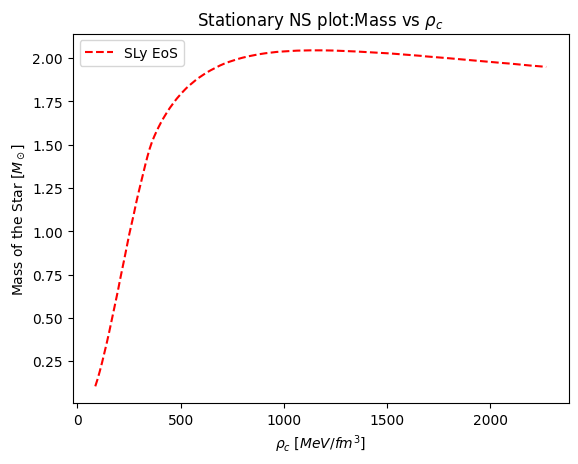

In [23]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Mass vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(rho/(1.3234*(10**(-6))),M_s,"r--",label="SLy EoS")

plt.legend(loc="best")
plt.show()

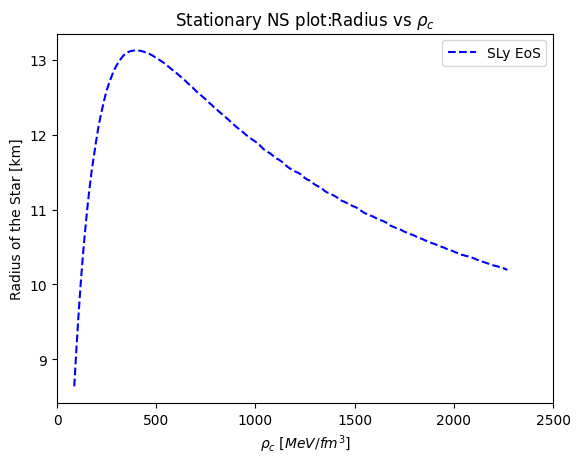

In [24]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot:Radius vs $\rho_c$")
ax.set_xlabel(r"$\rho_c$ [$MeV/fm^3$]")
ax.set_ylabel(r"Radius of the Star [km]")
plt.plot(rho/(1.3234*(10**(-6))),R_s,"b--",label="SLy EoS")

plt.xlim(0,2500)

plt.legend(loc="best")
plt.show()

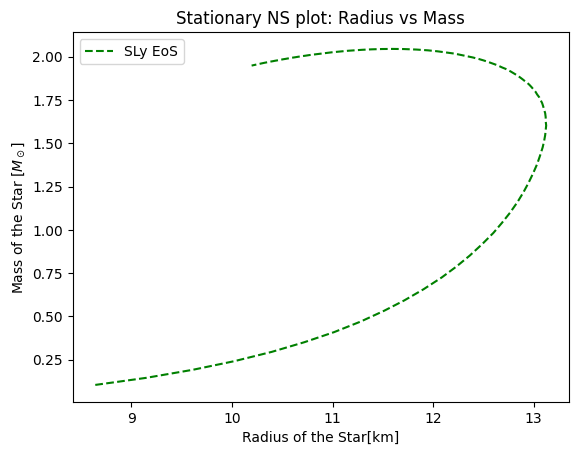

In [25]:
plt.figure()
ax=plt.gca()
ax.set_title(r"Stationary NS plot: Radius vs Mass")
ax.set_xlabel(r"Radius of the Star[km]")
ax.set_ylabel(r"Mass of the Star [$M_\odot$]")
plt.plot(R_s,M_s,"g--",label="SLy EoS")

plt.legend(loc="best")
plt.show()